In [203]:
import numpy as np
import h5py
import sys
import matplotlib.pyplot as pl
from stringato import extract_floats as ef
import numpy as np
from scipy.spatial.distance import pdist
from numba  import jit
import os
import ipyvolume as ipv

from scipy.interpolate import UnivariateSpline




@jit(nopython=True)
def get_dists(box):
    points = np.random.uniform(0,1,size=(3,3))
    for k in range(3):
        points[:,k] *=box[k] 

    dists = np.zeros(3)
    count=0
    for i in range(2):
        for j in range(i+1,3):
            d=np.absolute(points[i]-points[j])
            d[d>L/2]-=L
            dist = np.linalg.norm(d)
            dists[count] = dist
            count+=1
    return sorted(dists)

@jit(nopython=True)
def repeat(nrepeat,box):
    data=np.zeros((nrepeat,3))
    for k in range(nrepeat):
        data[k]=get_dists(box)
    return data


def get_probability(values,bins):
    H,e = np.histogramdd(values, bins=(bins,bins,bins), normed=True)

    H[H==0]=H.min()
    return H

filename = "store-L5.0Pe60.0.hdf5"
Pe = 60.0
L = 5.0
# n = 100

N = 100

box = [L,L,L]

depletion = np.loadtxt(f"../Interactions/depletion-Pe{Pe}L4.0.txt")

tb = UnivariateSpline(depletion[:,0], depletion[:,1],s=0)




idealfile= "ideal-L%s.hdf5"%L
if os.path.isfile(idealfile):
    print("File already exists")
    with h5py.File(idealfile, 'r') as fin:
        ideal = fin['dataset'][()]
else:    
    ideal=repeat(100000000,box)#100000000
    print  ("Create ideal")
    with h5py.File(idealfile, 'w') as fout:
        fout.create_dataset('dataset',data=ideal)


# print (ideal)
small = np.exp(-50)
bins = np.linspace(0, L, N+1)
cutoff =2.5

ideal_pb = get_probability(ideal,bins)

from scipy.ndimage.filters import median_filter
with h5py.File(filename, 'r') as fin:
    # print(fin.keys())
    for key,value in fin.items():
        if key=="run2":
            values = np.array(value)

            # if (np.all((values[:,0]<=values[:,1])* (values[:,1]<=values[:,2]))):
            #     print("Order is ok")
            # else:
            #     print("Order is wrong")
            #     exit()

            H,e = np.histogramdd(values, bins=(bins,bins,bins), density=True)
            # H[H==0] =small
            potential = -np.log(H/ideal_pb)
            # smoothen
            potential[np.logical_not(np.isfinite(potential))]=0
#             potential[H==0]=0
#             potential= median_filter(potential, size=4)
#             potential[bins[:-1]>cutoff,bins[:-1]>cutoff,bins[:-1]>cutoff]=0


File already exists


/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in true_divide
/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in true_divide
/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log


In [206]:
H.max()/H[H>0].min()

196.0000000000052

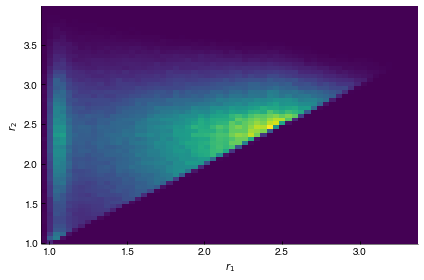

In [228]:
pl.hist2d(values[:,0],values[:,1], bins=60);
pl.xlabel("$r_1$");
pl.ylabel("$r_2$");
pl.savefig("prob_r1_r2.png")

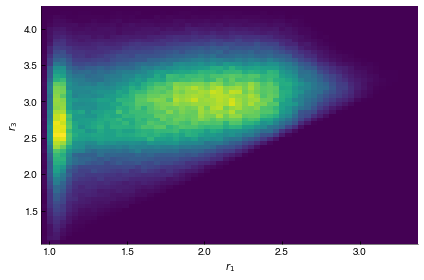

In [232]:
pl.hist2d(values[:,0],values[:,2], bins=60);
pl.xlabel("$r_1$");
pl.ylabel("$r_3$");
pl.savefig("prob_r1_r3.png")

pl.hist2d(values[:,1],values[:,2], bins=60);
pl.xlabel("$r_2$");
pl.ylabel("$r_3$");
pl.savefig("prob_r3_r3.png")

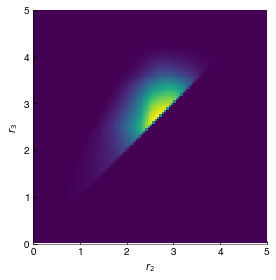

In [243]:
pl.imshow(ideal_pb.mean(axis=0).T, origin="left", extent=[0,L,0,L]);
pl.xlabel("$r_2$");
pl.ylabel("$r_3$");
pl.savefig("ideal_r2_r3.png")

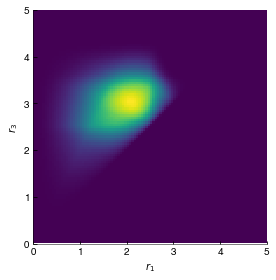

In [244]:
pl.imshow(ideal_pb.mean(axis=1).T, origin="left", extent=[0,L,0,L]);
pl.xlabel("$r_1$");
pl.ylabel("$r_3$");
pl.savefig("ideal_r1_r3.png")

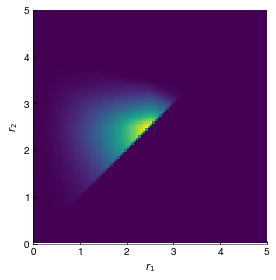

In [245]:
pl.imshow(ideal_pb.mean(axis=2).T, origin="left", extent=[0,L,0,L]);
pl.xlabel("$r_1$");
pl.ylabel("$r_2$");
pl.savefig("ideal_r1_r2.png")

In [208]:
angles = np.zeros(np.shape(values))

for i in range(3):
    a = (i+1)%3
    b = (i+2)%3
    print(a,b,i)
    angles[:,i]= np.arccos(( values[:,a]**2+values[:,b]**2-values[:,i]**2)/(2*values[:,a]*values[:,b]))

1 2 0
2 0 1
0 1 2


/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys


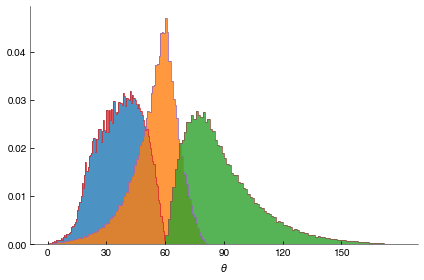

In [263]:
pl.hist(angles[:,0]*180/np.pi, alpha=0.8,density=True,bins=100);
pl.hist(angles[:,1]*180/np.pi, alpha=0.8,density=True,bins=100);
pl.hist(angles[:,2]*180/np.pi, alpha=0.8,density=True,bins=100);
pl.xticks(np.arange(0,180,30));
pl.xlabel(r"$\theta$")

pl.savefig("angle_pb.pdf")

In [257]:
n= 1000000
id_angles = np.zeros((n,3))

for i in range(3):
    a = (i+1)%3
    b = (i+2)%3
    print(a,b,i)
    id_angles[:,i]= np.arccos((ideal[:n,a]**2+ideal[:n,b]**2-ideal[:n,i]**2)/(2*ideal[:n,a]*ideal[:n,b]))

1 2 0
2 0 1
0 1 2


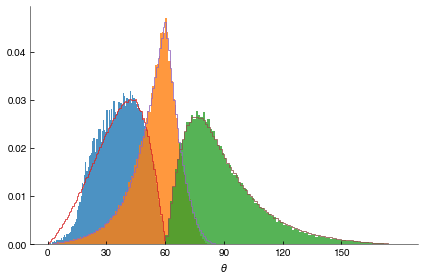

In [264]:
pl.hist(angles[:,0]*180/np.pi, alpha=0.8,density=True,bins=100);
pl.hist(angles[:,1]*180/np.pi, alpha=0.8,density=True,bins=100);
pl.hist(angles[:,2]*180/np.pi, alpha=0.8,density=True,bins=100);
pl.hist(id_angles[:,0]*180/np.pi, alpha=0.8,density=True,bins=100,histtype="step");
pl.hist(id_angles[:,1]*180/np.pi, alpha=0.8,density=True,bins=100,histtype="step");
pl.hist(id_angles[:,2]*180/np.pi, alpha=0.8,density=True,bins=100,histtype="step");
pl.xticks(np.arange(0,180,30));
pl.xlabel(r"$\theta$")

pl.savefig("angle_id_pb.pdf")

In [30]:
ratio = H[H>0].min()/H.max()
zeroedH = H
zeroedH[H<2*ratio]=0

potential =-np.log(zeroedH/ideal_pb)
potential[np.logical_not(np.isfinite(potential))]=0
potential[bins[:-1]>cutoff,bins[:-1]>cutoff,bins[:-1]>cutoff]=0
potential.min()

/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


-2.8674779380303117

In [37]:
ipv.quickvolshow(potential, level=[-2, -1,0,0.1],opacity=0.3, level_width=0.05, data_min=potential.min(), data_max=potential.max())



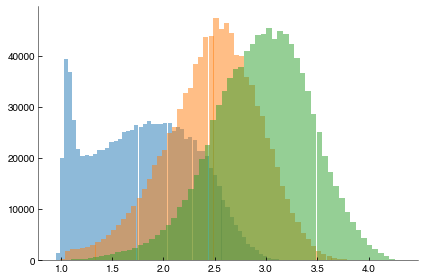

In [43]:
pl.hist(values[:,0],alpha=0.5, bins=60);
pl.hist(values[:,1],alpha=0.5, bins=60);
pl.hist(values[:,2],alpha=0.5, bins=60);

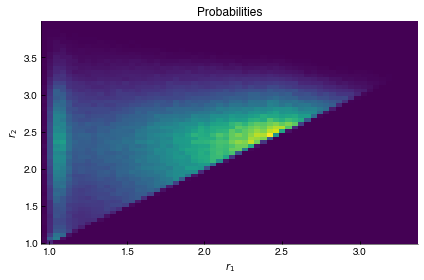

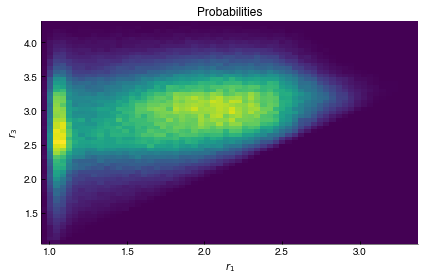

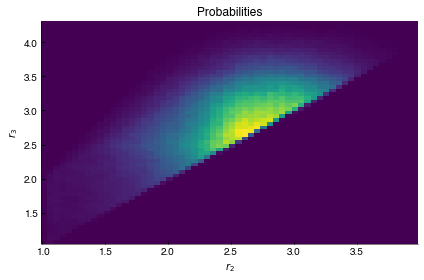

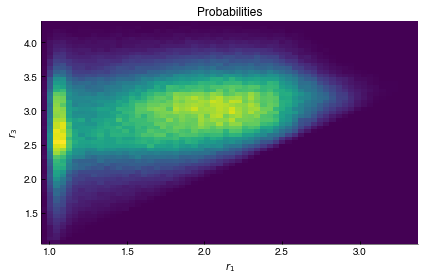

<Figure size 432x288 with 0 Axes>

In [54]:
for k in [(0,1),(0,2), (1,2), (0,2)]:
    pl.hist2d(values[:,k[0]], values[:,k[1]],bins=60)
    pl.xlabel("$r_%d$"%(k[0]+1))
    pl.ylabel("$r_%d$"%(k[1]+1))
    pl.title("Probabilities")
    pl.figure()

In [170]:
rmin  =1.0
def twobody(r):
	return np.piecewise(r,[r<1.0, r>2.5, ],[0,0,tb])

def condition(r1,r2,r3):
    forbidden = (r1>r2)+(r3<r2)+(r3<r1)+(r1<rmin)+(r2<rmin)+(r3<rmin)+(r1>2.5)+(r2>2.5)+(r3>2.5)
    return forbidden 

def twobody_triangle(r1,r2,r3):
	U= twobody(r1)+twobody(r2)+twobody(r3)

	forbidden = condition(r1,r2,r3)
	U[forbidden]=0
	return U






/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


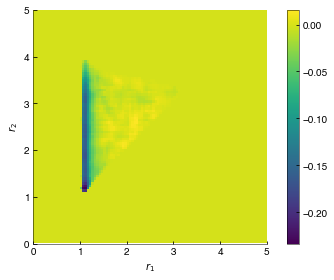

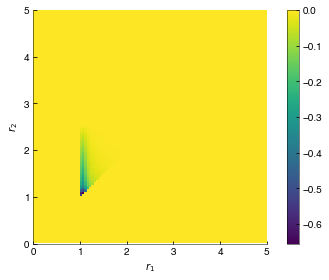

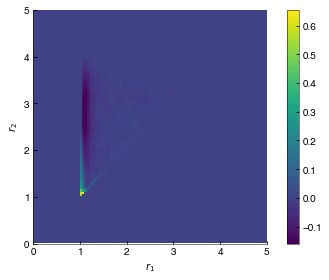

In [274]:

cnt = bins[:-1]+(bins[1]-bins[0])/2

R1,R2,R3 = np.meshgrid(cnt,cnt,cnt, indexing="ij")
twopotential =  twobody_triangle(R1,R2,R3)

potential = -np.log(H/ideal_pb)

potential[np.logical_not(np.isfinite(potential))]=0
forbidden = condition(R1,R2,R3)
potential= median_filter(potential, size=4)

# potential[H<H.max()/100]=0
# potential[forbidden]=0
# potential = twopotential


pl.imshow(potential.mean(axis=2).T, origin="left", extent=[0,L,0,L])
pl.xlabel("$r_1$"),pl.ylabel("$r_2$")
pl.colorbar()
pl.savefig('logP.pdf');

pl.figure()
pl.imshow(twopotential.mean(axis=2).T, origin="left", extent=[0,L,0,L])
pl.xlabel("$r_1$"),pl.ylabel("$r_2$")
pl.colorbar()
pl.savefig('logP2.pdf');

pl.figure()
pl.imshow((potential-twopotential).mean(axis=2).T, origin="left", extent=[0,L,0,L])
pl.xlabel("$r_1$"),pl.ylabel("$r_2$")
pl.colorbar()
pl.savefig('logP-P2.pdf');

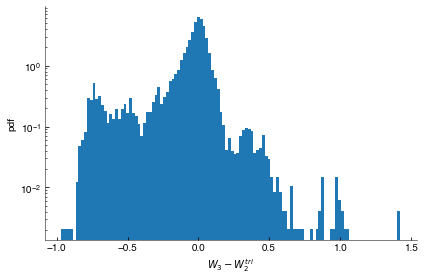

In [282]:
pl.hist ((potential-twopotential)[potential!=0].ravel(), bins=120, density=True);
pl.xlabel(r"$W_3-W_2^{tri}$");
pl.yscale('log')
pl.ylabel("pdf")
pl.savefig("deltas.pdf")

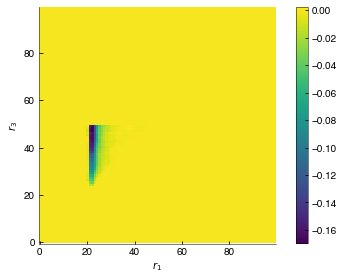

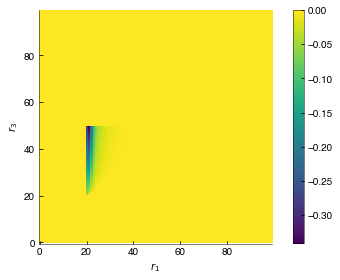

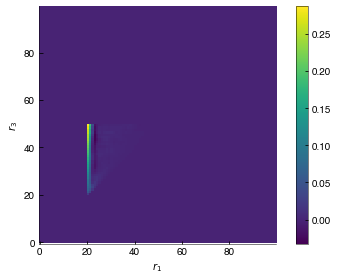

In [202]:
pl.imshow(potential.mean(axis=1).T, origin="left")
pl.xlabel("$r_1$"),pl.ylabel("$r_3$")
pl.colorbar()
pl.figure()
pl.imshow(twopotential.mean(axis=1).T, origin="left")
pl.xlabel("$r_1$"),pl.ylabel("$r_3$")
pl.colorbar()
pl.figure()
pl.imshow((potential-twopotential).mean(axis=1).T, origin="left")
pl.xlabel("$r_1$"),pl.ylabel("$r_3$")
pl.colorbar()

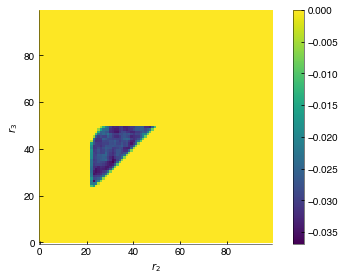

In [185]:
pl.imshow(potential.mean(axis=0).T, origin="left")
pl.xlabel("$r_2$"),pl.ylabel("$r_3$")
pl.colorbar()